In [1]:
import requests
from datetime import datetime
from matplotlib import pyplot as plt
from time import sleep
import numpy as np

In [2]:
def getKillMails():
    """
    get all the kills of the AKINA mountain family corporation from https://zkillboard.com/corporation/98615098/kills/
    this is the corporation that hosts all the CCTV EYES XY, AKINA MOUNTAIN XY etc.
    """
    morePages = True
    page = 1
    killmails = []

    while morePages == True:
        url = "https://zkillboard.com/api/kills/corporationID/98615098/page/" + str(page) + "/"
        
        response = requests.get(url)
        

        #zkill does not seem to like getting DDoSed, so adding a delay
        sleep(1)
        

        if response.status_code != 200:
            morePages = False
        
        else:
            killmails = killmails + response.json()
            page += 1

            #only take the first 30 pages = 6000 killmails
            if page > 30:
                morePages = False

        
    return(killmails)

def getKillMailDetails(id, hash):
    """
    the zkillboard response does not include many details, so retrieve those from ESI
    """

    url = "https://esi.evetech.net/latest/killmails/" + str(id) + "/" + str(hash) + "/?datasource=tranquility"
    response = requests.get(url)

    return(response.json())


In [3]:
#get the killmails
killmails = getKillMails()
print(len(killmails))

6000


In [4]:
killmailDetails = []

# this will take a while, expect 4-5 minutes per 1000 killmails. go get yourself a coffee.
# it will also likely timeout at some point as ESI does not like to get DDoSed either, but I do not care enough to add a delay here

for km in killmails:
    killmailID = km["killmail_id"]
    killmailHash = km["zkb"]["hash"]

    details = getKillMailDetails(killmailID, killmailHash)

    killmailDetails.append(details)

print(len(killmailDetails),"killmails in total")
    
    

6000 killmails in total


In [5]:
print(len(killmailDetails))

6000


In [6]:
#ignore large fights
prunedKillmails = []

for km in killmailDetails:
    killmailAdded = False

    try:
        if km["victim"]["ship_type_id"] != 670:                                                         # ignore pods

            try:
                if len(km["attackers"]) < 9:                                                            # this is to limit the killmails to (mostly)drops, rather than large fleet fights, that the members of AKINA mountain family join
                    if (datetime.now() - datetime.fromisoformat(km["killmail_time"][:-1])).days < 30:   # killmails from last 90 days
                        for attacker in km["attackers"]:
                            if attacker["ship_type_id"] == 11969 and killmailAdded == False:            # add killmails including an arazu to the list
                                prunedKillmails.append(km)
                                killmailAdded = True

            
            except: pass
    except: pass
print(len(prunedKillmails), "killmails in total")

188 killmails in total


In [7]:
finalBlowAlliance = []
suspiciousKillmails = []
for km in prunedKillmails:
    for attacker in km["attackers"]:
        if attacker["final_blow"]:
            try:
                if attacker["alliance_id"] != 99011168:                                                 # add kills where the killing blow was not dealt by member of AKINA mountain family to separate list
                    suspiciousKillmails.append(km)
                    finalBlowAlliance.append(attacker["alliance_id"])

                    
            except: pass

In [8]:
# this can be ignored now

print(len(suspiciousKillmails))
print(len(set(finalBlowAlliance)))

35
1


In [9]:
killmailTimes = []
for km in prunedKillmails:
    killmailTimes.append(km["killmail_time"])

killHour = []

for time in killmailTimes:
    killHour.append(datetime.fromisoformat(time[:-1]).hour)

In [10]:
# this can be ignored now

suspiciousHours = []
suspiciousTimes = []

for km in suspiciousKillmails:
    suspiciousTimes.append(km["killmail_time"])

for time in suspiciousTimes:
    suspiciousHours.append(datetime.fromisoformat(time[:-1]).hour)

In [94]:
dayOfWeek = []

# mondayKills = []
# tuesdayKills = []
# wednesdayKills = []
# thursdayKills = []
# fridayKills = []
# saturdayKills = []
# sundayKills = []

mondayKillsHour = []
tuesdayKillsHour = []
wednesdayKillsHour = []
thursdayKillsHour = []
fridayKillsHour = []
saturdayKillsHour = []
sundayKillsHour = []

for time in killmailTimes:
     dayOfWeek.append(datetime.fromisoformat(time[:-1]).strftime("%a"))
     # dayOfWeek.append(datetime.fromisoformat(time[:-1]).weekday())     

     if datetime.fromisoformat(time[:-1]).strftime("%a") == 'Mon':
          mondayKillsHour.append(datetime.fromisoformat(time[:-1]).hour)

     elif datetime.fromisoformat(time[:-1]).strftime("%a") == 'Tue':
          tuesdayKillsHour.append(datetime.fromisoformat(time[:-1]).hour)

     elif datetime.fromisoformat(time[:-1]).strftime("%a") == 'Wed':
          wednesdayKillsHour.append(datetime.fromisoformat(time[:-1]).hour)
     
     elif datetime.fromisoformat(time[:-1]).strftime("%a") == 'Thu':
          thursdayKillsHour.append(datetime.fromisoformat(time[:-1]).hour)

     elif datetime.fromisoformat(time[:-1]).strftime("%a") == 'Fri':
          fridayKillsHour.append(datetime.fromisoformat(time[:-1]).hour)

     elif datetime.fromisoformat(time[:-1]).strftime("%a") == 'Sat':
          saturdayKillsHour.append(datetime.fromisoformat(time[:-1]).hour)

     elif datetime.fromisoformat(time[:-1]).strftime("%a") == 'Sun':
          sundayKillsHour.append(datetime.fromisoformat(time[:-1]).hour)


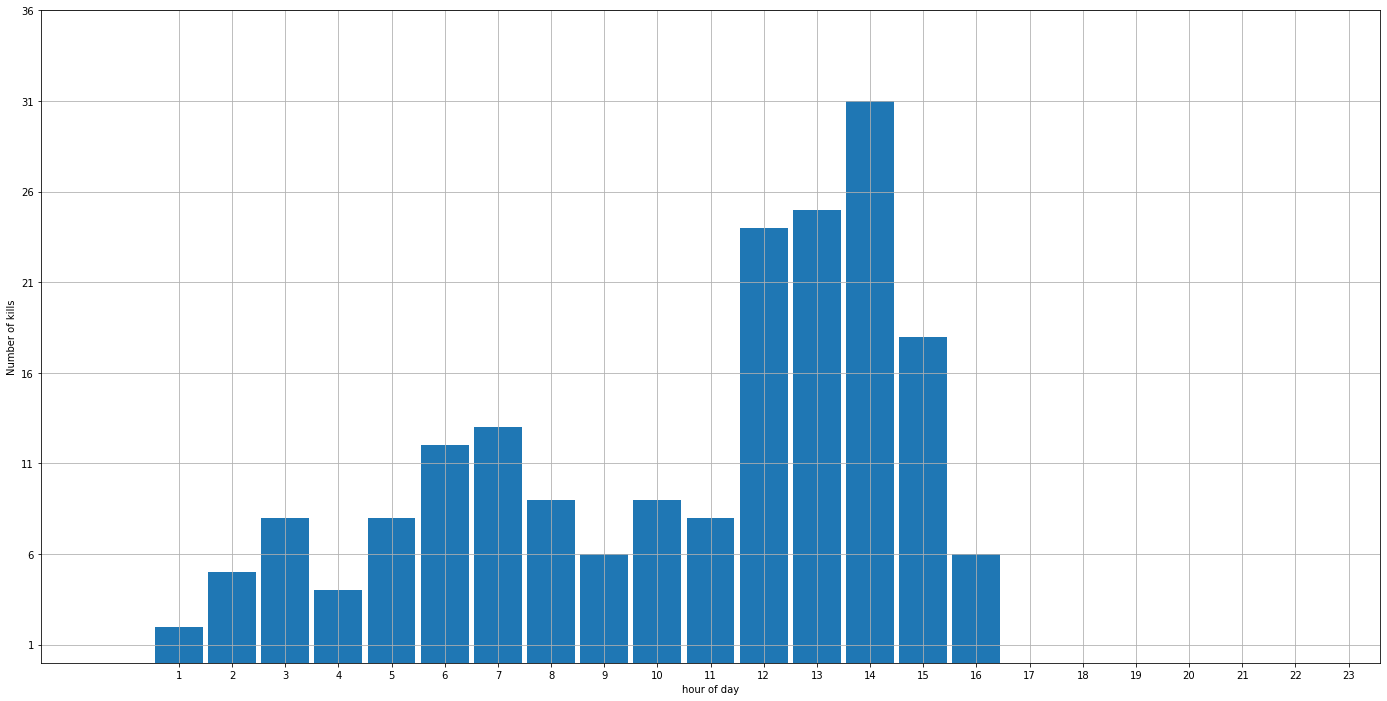

In [135]:
plt.figure(figsize=(24, 12))

plt.hist(killHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(suspiciousHours, bins=np.arange(24)-0.5, rwidth=0.9)
plt.xlabel('hour of day')
plt.xticks(np.arange(1,24,1))
plt.yticks(np.arange(1,40,5))
plt.ylabel('Number of kills')
plt.grid()

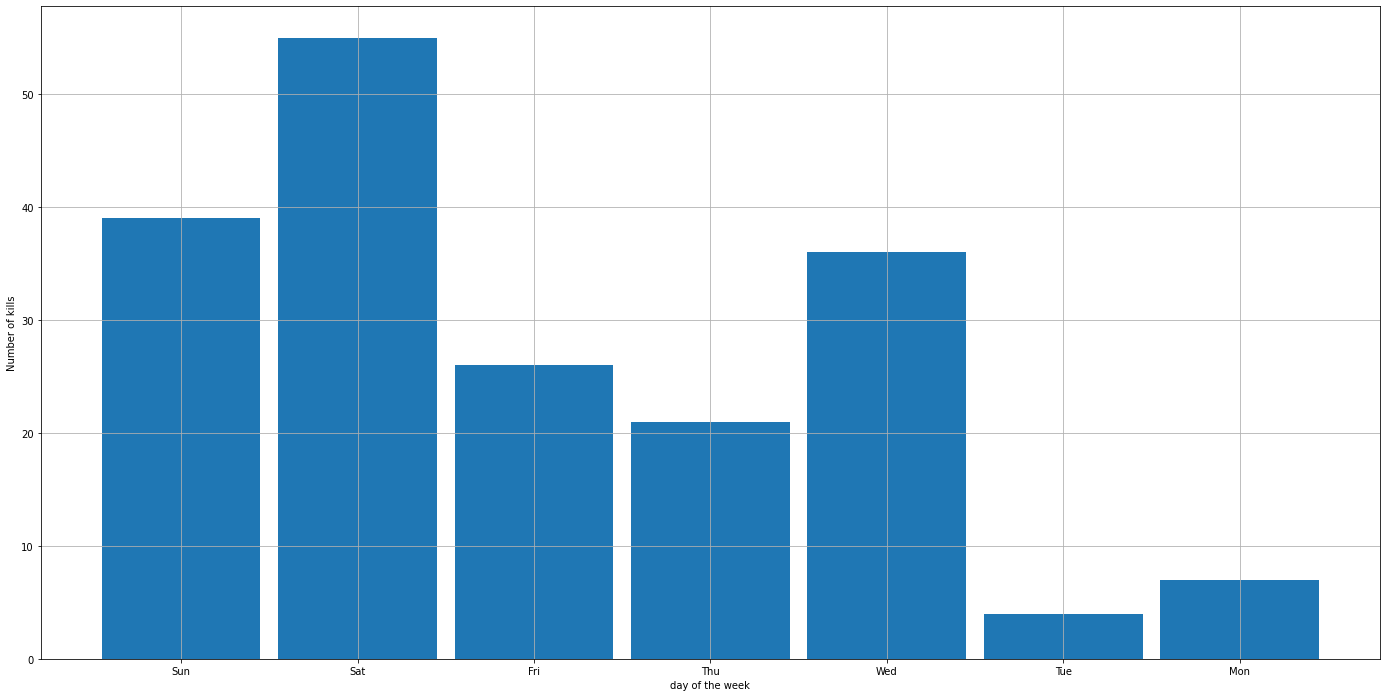

In [136]:
days = ["Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

plt.figure(figsize=(24, 12))

plt.hist(dayOfWeek, bins=np.arange(8)-0.5, rwidth=0.9)
# plt.hist(dayOfWeek, rwidth=0.9)
# plt.hist(suspiciousHours, bins=np.arange(24)-0.5, rwidth=0.9)
plt.xlabel('day of the week')
# plt.xticks(np.arange(0,7,1))
# plt.xticks(list(set(dayOfWeek)))
# plt.xticks(days)
# plt.yticks(np.arange(1,60,5))
plt.ylabel('Number of kills')
plt.grid()

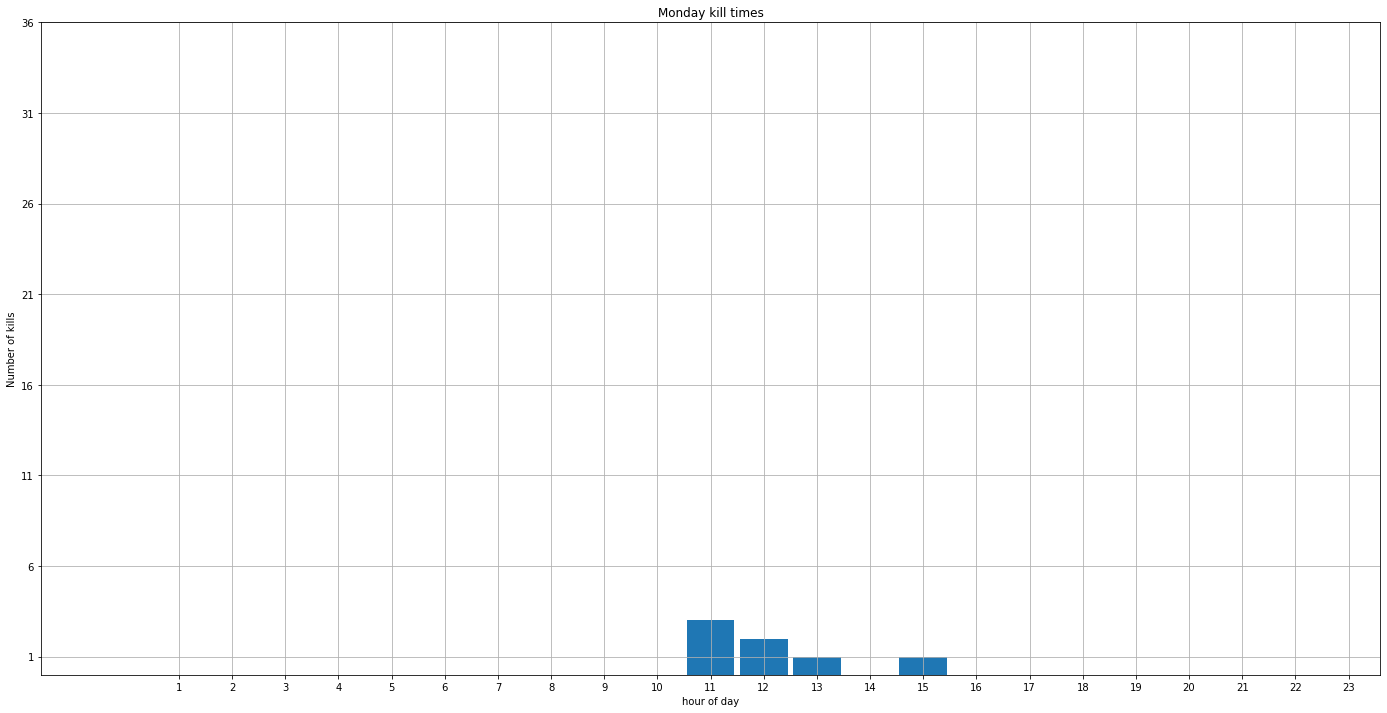

In [137]:
plt.figure(figsize=(24, 12))
plt.title("Monday kill times")
plt.hist(mondayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(tuesdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(wednesdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(thursdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(fridayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(saturdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(sundayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)

# plt.hist(suspiciousHours, bins=np.arange(24)-0.5, rwidth=0.9)
plt.xlabel('hour of day')
plt.xticks(np.arange(1,24,1))
plt.yticks(np.arange(1,40,5))
plt.ylabel('Number of kills')
plt.grid()

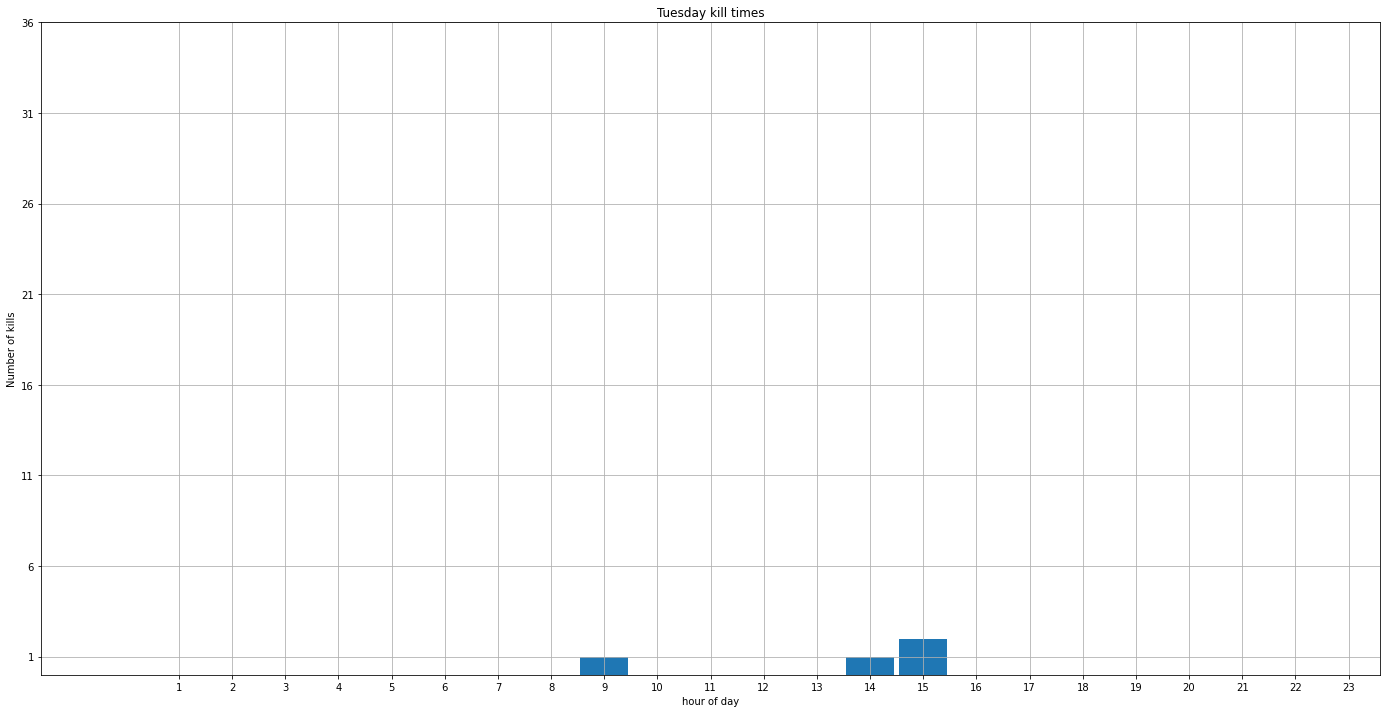

In [126]:
plt.figure(figsize=(24, 12))
plt.title("Tuesday kill times")
# plt.hist(mondayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
plt.hist(tuesdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(wednesdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(thursdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(fridayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(saturdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(sundayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)

# plt.hist(suspiciousHours, bins=np.arange(24)-0.5, rwidth=0.9)
plt.xlabel('hour of day')
plt.xticks(np.arange(1,24,1))
plt.yticks(np.arange(1,40,5))
plt.ylabel('Number of kills')
plt.grid()

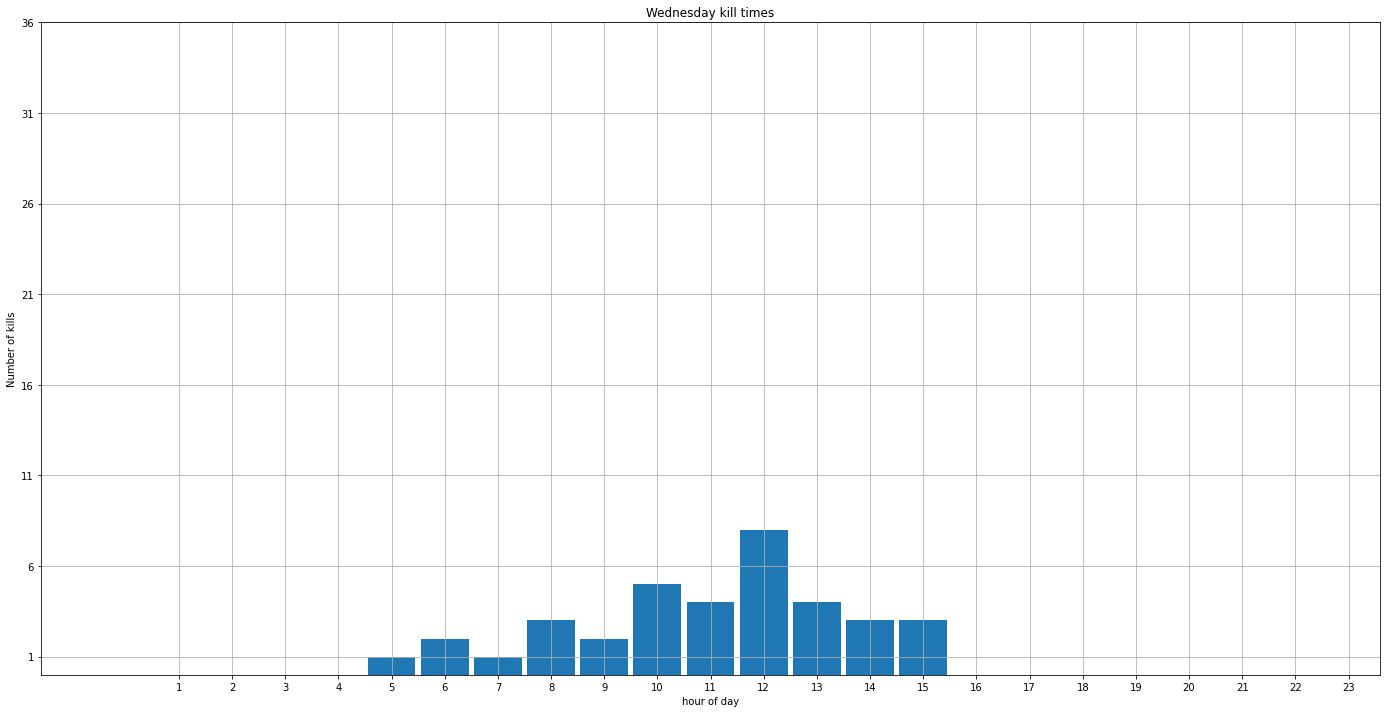

In [139]:
plt.figure(figsize=(24, 12))
plt.title("Wednesday kill times")
# plt.hist(mondayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(tuesdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
plt.hist(wednesdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(thursdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(fridayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(saturdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(sundayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)

# plt.hist(suspiciousHours, bins=np.arange(24)-0.5, rwidth=0.9)
plt.xlabel('hour of day')
plt.xticks(np.arange(1,24,1))
plt.yticks(np.arange(1,40,5))
plt.ylabel('Number of kills')
plt.grid()

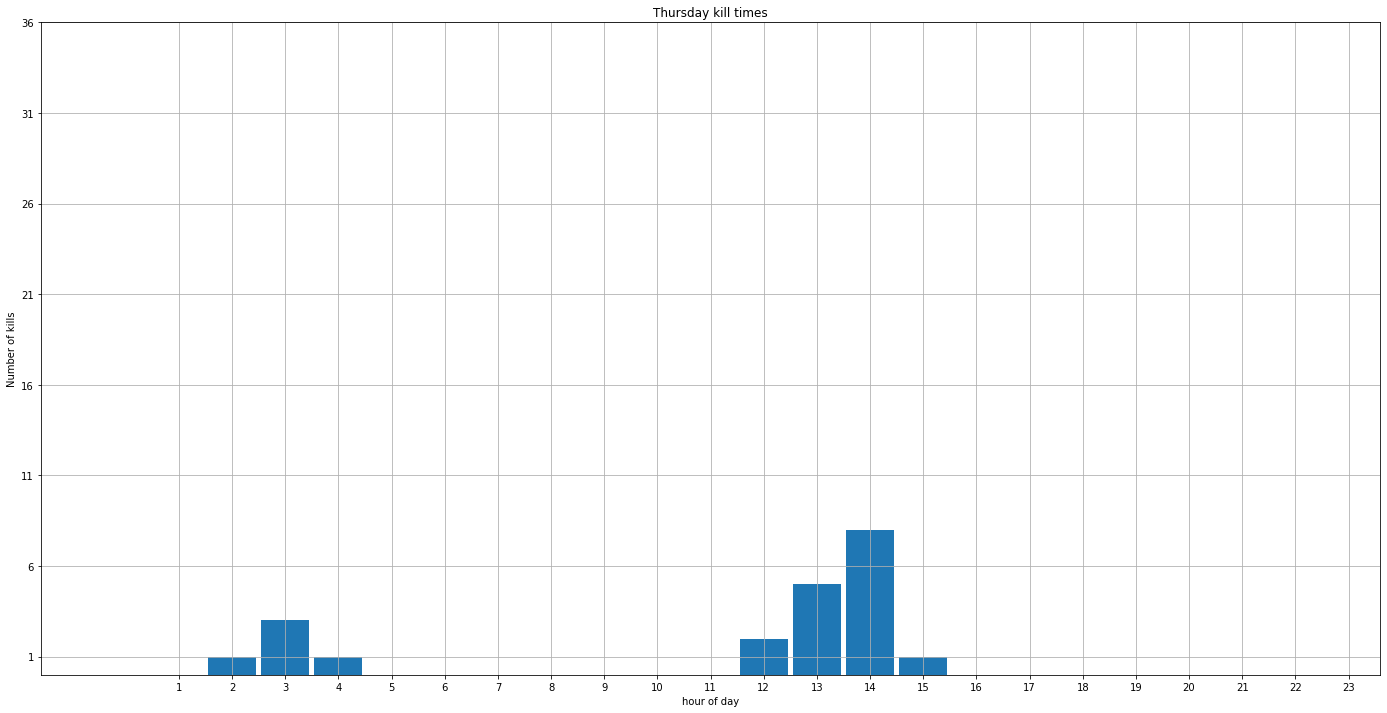

In [140]:
plt.figure(figsize=(24, 12))
plt.title("Thursday kill times")
# plt.hist(mondayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(tuesdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(wednesdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
plt.hist(thursdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(fridayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(saturdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(sundayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)

# plt.hist(suspiciousHours, bins=np.arange(24)-0.5, rwidth=0.9)
plt.xlabel('hour of day')
plt.xticks(np.arange(1,24,1))
plt.yticks(np.arange(1,40,5))
plt.ylabel('Number of kills')
plt.grid()

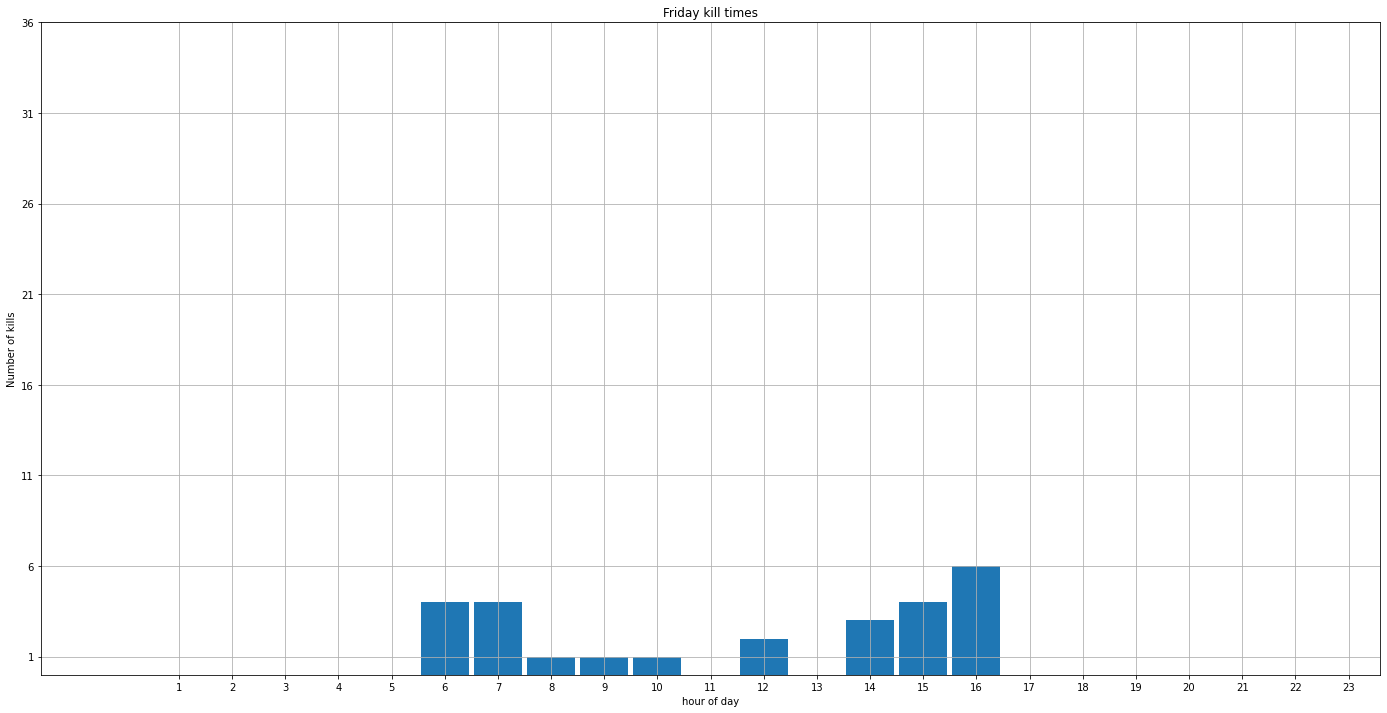

In [141]:
plt.figure(figsize=(24, 12))
plt.title("Friday kill times")
# plt.hist(mondayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(tuesdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(wednesdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(thursdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
plt.hist(fridayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(saturdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(sundayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)

# plt.hist(suspiciousHours, bins=np.arange(24)-0.5, rwidth=0.9)
plt.xlabel('hour of day')
plt.xticks(np.arange(1,24,1))
plt.yticks(np.arange(1,40,5))
plt.ylabel('Number of kills')
plt.grid()

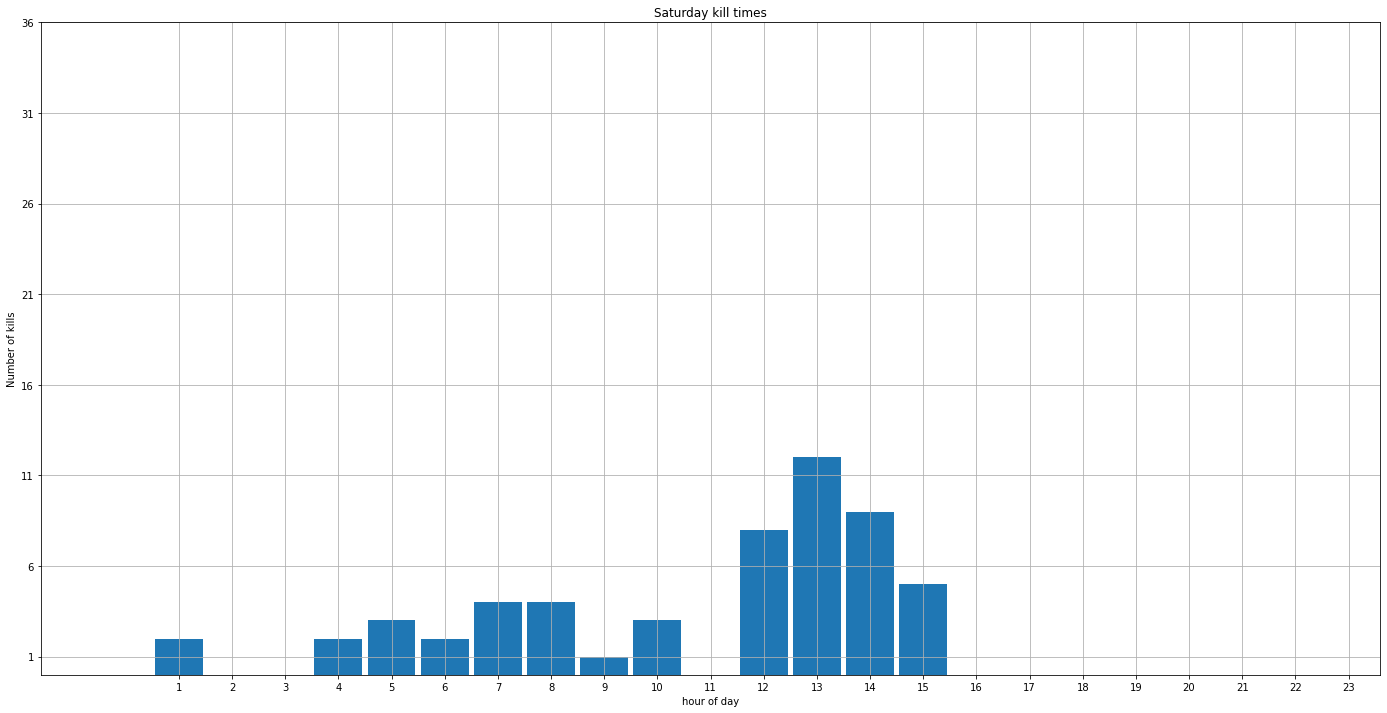

In [142]:
plt.figure(figsize=(24, 12))
plt.title("Saturday kill times")
# plt.hist(mondayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(tuesdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(wednesdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(thursdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(fridayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
plt.hist(saturdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(sundayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)

# plt.hist(suspiciousHours, bins=np.arange(24)-0.5, rwidth=0.9)
plt.xlabel('hour of day')
plt.xticks(np.arange(1,24,1))
plt.yticks(np.arange(1,40,5))
plt.ylabel('Number of kills')
plt.grid()

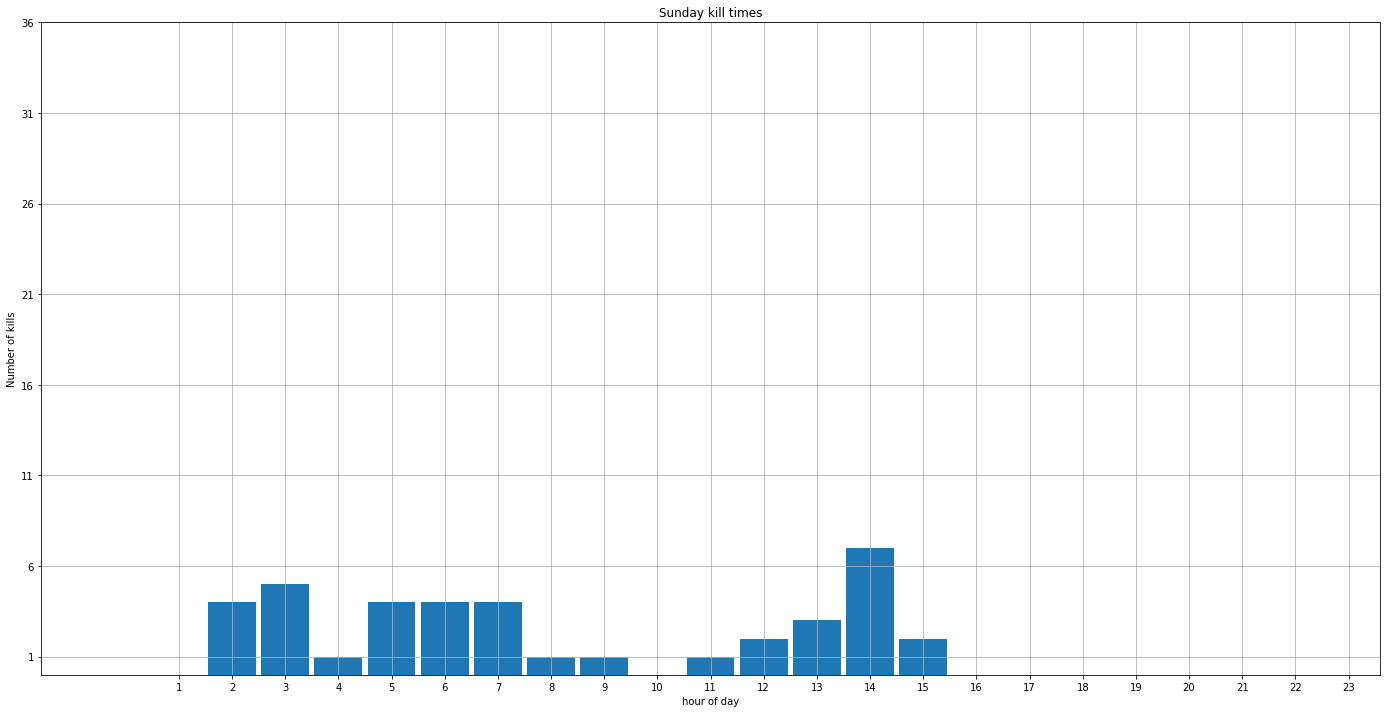

In [143]:
plt.figure(figsize=(24, 12))
plt.title("Sunday kill times")
# plt.hist(mondayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(tuesdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(wednesdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(thursdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(fridayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
# plt.hist(saturdayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)
plt.hist(sundayKillsHour, bins=np.arange(24)-0.5, rwidth=0.9)

# plt.hist(suspiciousHours, bins=np.arange(24)-0.5, rwidth=0.9)
plt.xlabel('hour of day')
plt.xticks(np.arange(1,24,1))
plt.yticks(np.arange(1,40,5))
plt.ylabel('Number of kills')
plt.grid()

In [132]:
# this can be ignored now

t0 = prunedKillmails[0]["killmail_time"][:-1]
timeDeltas = []
timeOfKill = []

for km in prunedKillmails[1:]:

    timeDeltas.append(datetime.fromisoformat(t0) - datetime.fromisoformat(km["killmail_time"][:-1]))
    timeOfKill.append(datetime.fromisoformat(km["killmail_time"][:-1]))
    
    t0 = km["killmail_time"][:-1]


In [18]:
# this can be ignored now


timeDeltasHours = []
sleep = []

for delta in timeDeltas:
    hours = delta.seconds / 3600
    timeDeltasHours.append(hours)
    if hours > 6 and hours <24:
        sleep.append(hours)
        

In [19]:
# this can be ignored now

print("average between kills ",np.average(timeDeltasHours))
print("median time between kills ",np.median(timeDeltasHours))
print("max time between kills ", np.max(timeDeltasHours))


average between kills  2.1801069518716574
median time between kills  0.26472222222222225
max time between kills  22.980555555555554


In [20]:
# create a separate old killmails as baseline to compare the new ones against

olderKillmails = []
newerKillmails = []

for km in prunedKillmails:
    if (datetime.now() - datetime.fromisoformat(km["killmail_time"][:-1])).days > 5:   # killmails from last 90 days
        olderKillmails.append(km)

for km in prunedKillmails:
    if (datetime.now() - datetime.fromisoformat(km["killmail_time"][:-1])).days <= 5:   # killmails from last 90 days
        newerKillmails.append(km)

In [21]:
newKillmailTimes = []
oldKillmailTimes = []

for km in olderKillmails:
    oldKillmailTimes.append(datetime.fromisoformat(km["killmail_time"][:-1]).hour)

for km in newerKillmails:
    newKillmailTimes.append(datetime.fromisoformat(km["killmail_time"][:-1]).hour)


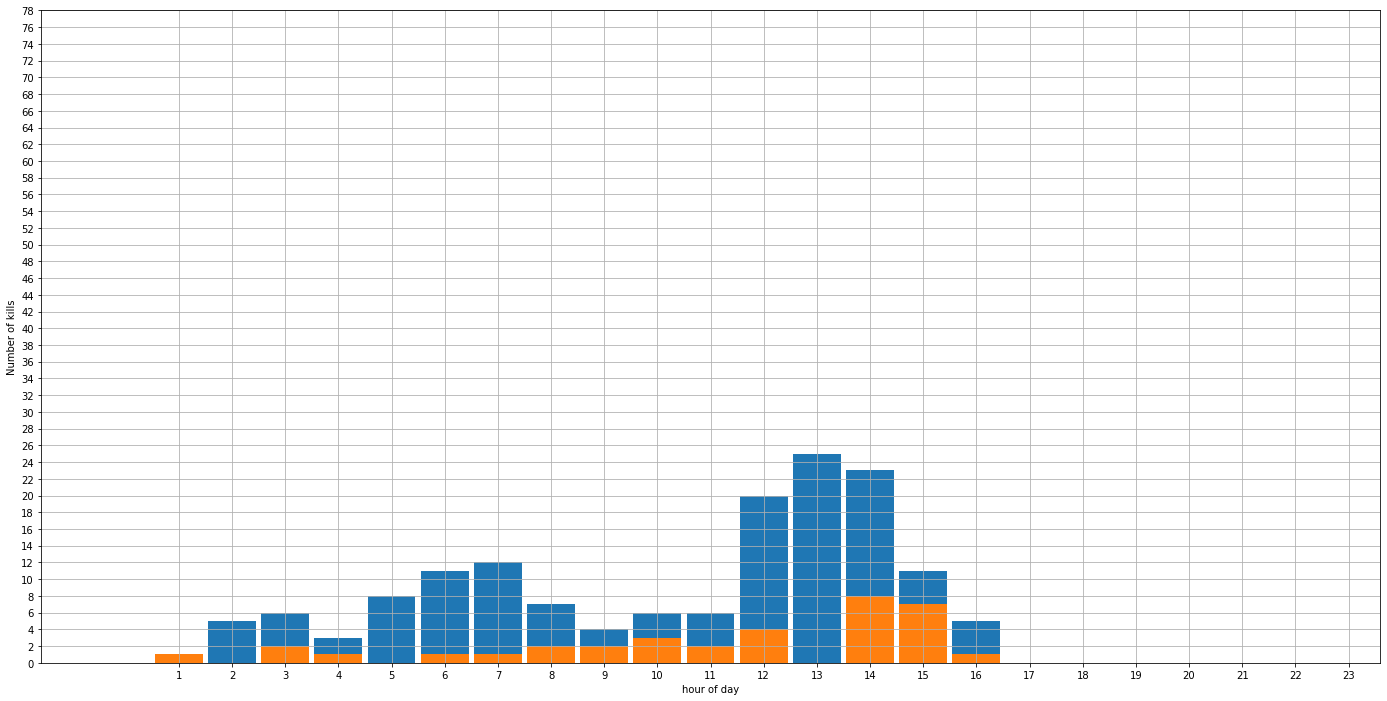

In [22]:
plt.figure(figsize=(24, 12))

plt.hist(oldKillmailTimes, bins=np.arange(24)-0.5, rwidth=0.9)
plt.hist(newKillmailTimes, bins=np.arange(24)-0.5, rwidth=0.9)
plt.xlabel('hour of day')
plt.xticks(np.arange(1,24,1))
plt.yticks(np.arange(0,80,2))
plt.ylabel('Number of kills')
plt.grid()
